# Time series clustering based on autocorrelation

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from statsmodels.tsa.arima_process import ArmaProcess

/Users/willie/.local/share/virtualenvs/time-series-demos-svg3QhUy/lib/python3.9/site-packages/statsmodels/compat/pandas.py:65: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


## 1 Generate time series dataset

In [2]:
# Define the ARMA processes. AR params must be negated. See
# https://www.statsmodels.org/dev/generated/statsmodels.tsa.arima_process.ArmaProcess.html
processes = [
    ArmaProcess.from_coeffs([0.0], [0.0]),
    ArmaProcess.from_coeffs([-0.5], [0.0]),
    ArmaProcess.from_coeffs([0.0], [0.9])
]

In [3]:
# Generate the time series.
df = pd.DataFrame()
for i in range(12):
    df[f"TS_{i}"] = processes[i // 4].generate_sample(500)

In [4]:
df.head(10)

,TS_0,TS_1,TS_2,TS_3,TS_4,TS_5,TS_6,TS_7,TS_8,TS_9,TS_10,TS_11
0,-0.045520,-1.683245,-2.155108,-0.040208,-0.421922,1.029165,0.907694,-0.737186,0.374899,-0.826777,-1.547946,0.629346
1,-0.042000,-0.451754,2.074751,-0.574046,0.361882,-0.460975,-0.019161,-1.027094,1.384348,-0.779556,-0.892194,1.741013
2,-0.326793,2.420458,-1.837716,-1.144816,-1.327112,-0.424113,-0.142943,1.458543,1.494574,1.201110,1.079927,1.085144
3,0.323518,0.397546,0.054589,0.328888,2.013812,-1.688481,-0.029355,-1.345064,-0.997516,1.222384,2.164561,1.256962
4,0.354243,0.671037,0.420707,1.014439,-1.500273,1.565215,-0.116036,-0.064471,-1.575089,-1.325154,2.535719,0.203806
5,0.040138,-0.990405,0.330436,1.678041,-0.439072,0.624538,0.784500,-0.117300,0.960452,-2.559579,0.332900,-0.839365
6,-1.838311,-1.158008,-0.549292,-1.771638,0.005347,-1.340873,-0.271379,0.382783,1.391449,-2.463349,-1.644551,0.555259
7,-2.595598,-0.373681,0.661488,1.245880,-0.193320,1.902303,-0.012074,-0.022553,0.805077,-1.673117,-1.926829,1.535470
8,-2.491085,0.556163,-0.086286,0.244610,0.989936,-1.952734,-1.515686,0.420818,0.958196,-0.106084,-1.363428,0.945782
9,0.989242,-0.631766,0.606688,0.937668,-0.482798,1.606024,1.808869,-0.577660,-0.993686,-2.941422,0.252597,1.010187


In [5]:
def plot_df(df, lower, upper, process):
    title = f"TS {lower}-{upper-1}\n{process}"
    df.iloc[:, lower:upper].plot(title=title, figsize=(12, 4), alpha=0.4)
    plt.show()

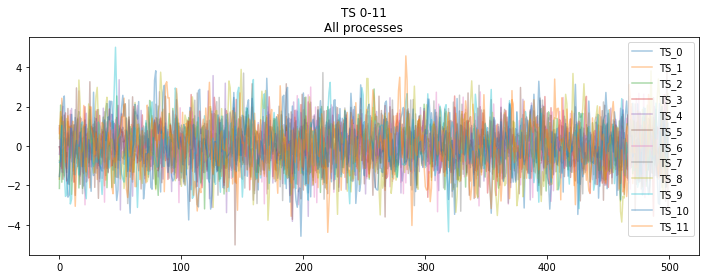

In [6]:
plot_df(df, 0, 12, "All processes")

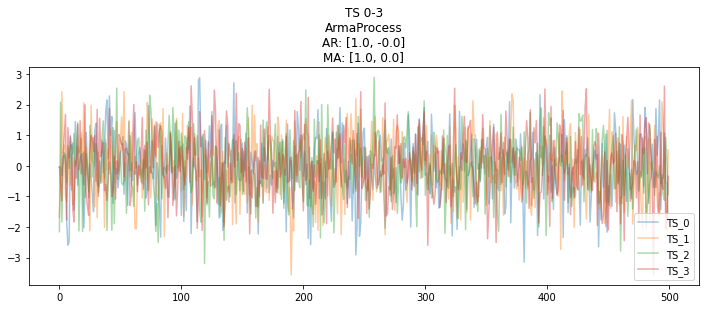

In [7]:
plot_df(df, 0, 4, processes[0])

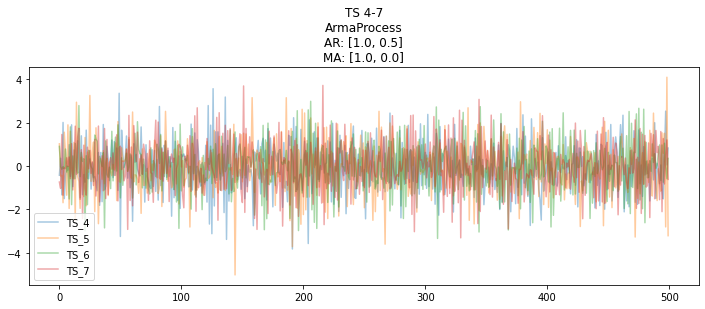

In [8]:
plot_df(df, 4, 8, processes[1])

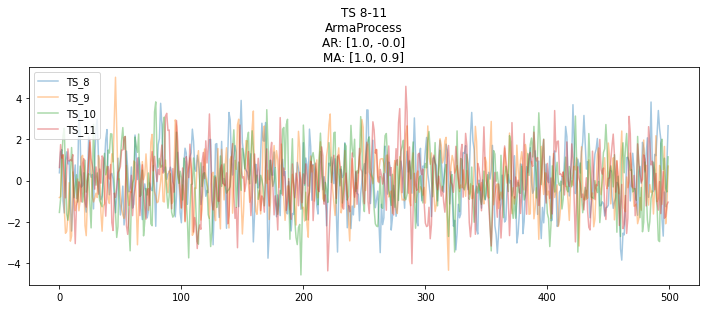

In [9]:
plot_df(df, 8, 12, processes[2])

## 2 Estimate ACFs 

In [10]:
max_lag = 10
lag_arr = np.repeat(max_lag, df.shape[1])
acf_list = list(map(sm.tsa.acf, df.transpose().to_numpy(), lag_arr))
acf_df = pd.DataFrame(acf_list).transpose()
acf_df.columns = df.columns

In [11]:
acf_df.head(10)

,TS_0,TS_1,TS_2,TS_3,TS_4,TS_5,TS_6,TS_7,TS_8,TS_9,TS_10,TS_11
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.010414,0.001905,-0.017666,0.007324,-0.513420,-0.456215,-0.573145,-0.545583,0.525796,0.440549,0.502579,0.495657
2,-0.018863,0.007002,-0.027489,-0.002005,0.284998,0.216477,0.399783,0.312039,0.051297,-0.132062,0.017345,0.036283
3,0.012112,0.030280,0.065871,-0.007094,-0.227061,-0.126690,-0.250066,-0.124834,0.046123,-0.105613,0.022195,0.047908
4,0.050129,0.026356,-0.054247,-0.065711,0.131498,0.084609,0.146009,0.000905,0.036024,-0.046812,-0.009021,-0.027596
5,-0.030911,-0.046524,-0.009834,0.046470,-0.060319,-0.086386,-0.068384,0.061389,0.048215,-0.039581,-0.048311,-0.040797
6,-0.077354,0.087805,0.007144,-0.015422,0.071421,0.001353,-0.017060,-0.083918,0.061741,-0.006685,-0.032515,-0.018934
7,-0.020751,0.030660,-0.010738,-0.028416,-0.077231,0.034822,-0.003608,0.063748,0.033145,0.049153,-0.001180,-0.058317
8,0.116878,-0.023240,0.030439,-0.004818,0.072086,-0.085987,-0.042593,0.012200,0.013139,0.027279,-0.009897,-0.045875
9,-0.022003,-0.083843,-0.060506,-0.104992,-0.065078,0.076303,-0.000327,-0.039350,0.016688,-0.019055,-0.026078,-0.017533


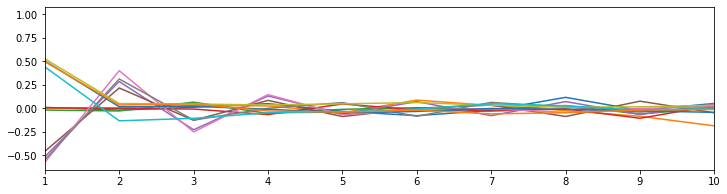

In [12]:
plt.figure(figsize=(12, 3))
plt.xlim((1, max_lag))
plt.plot(acf_df)
plt.show()

## 3 Find clusters

In [13]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(acf_df.transpose())
kmeans.labels_

array([2, 2, 2, 2, 0, 0, 0, 0, 1, 1, 1, 1], dtype=int32)

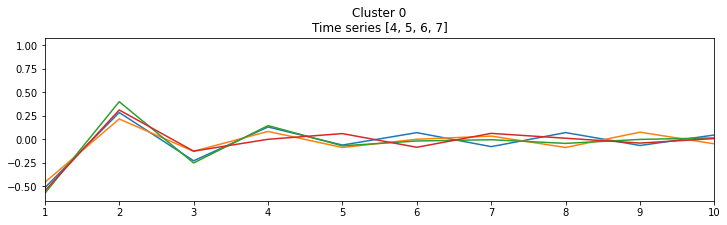

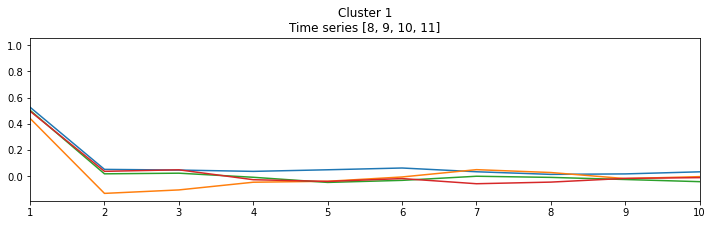

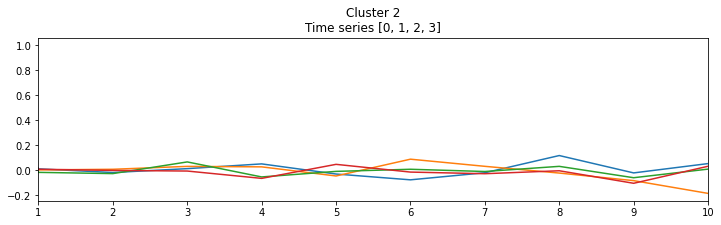

In [20]:
# i ranges over clusters
for i in range(3):
    plt.figure(figsize=(12, 3))
    plt.xlim((1, max_lag))
    
    ts = []
    
    # j ranges over the ACFs
    for j in range(acf_df.shape[1]):
        
        # Plot ACF j in the current cluster i
        if kmeans.labels_[j] == i:
            ts.append(j)
            plt.plot(acf_df.iloc[:, j])
    
    plt.title(f"Cluster {i}\nTime series {ts}")
    plt.show()